# INFO 300 Final Project

#### Metric Ideas:
- Youtube “Interaction’
    - Function of likes, dislikes, comments (possibly take into account comments/ratings_disabled)
    - Measures how much interaction users had with the content
- Views
- Category (get mapping through XX_category_id.json files)

- Time
    - Trending date
        - Talk about this (our data is already “trending data”, so we’d be looking at what trends most and least amongst already trending videos, not all videos) —> do we want more data?
        
        
- Youtube's definition of "trending"
    - How quickly it generated views (which we don't have, talk about in disucssion)
    - How long the video has been around (does this mean more trending or less trending?)
    - etc.

#### Northern Meteorological Seasons
- Spring: March 1 to May 31
- Summer: June 1 to August 31
- Fall: September 1 to November 30
- Winter: December 1 to February 28 (February 29 on a leap year)

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [144]:
# Load all country datasets into DataFrames
US = pd.read_csv('./../youtube-new/USvideos.csv')
CA = pd.read_csv('./../youtube-new/CAvideos.csv', encoding='UTF-8')
DE = pd.read_csv('./../youtube-new/DEvideos.csv', encoding='UTF-8')
FR = pd.read_csv('./../youtube-new/FRvideos.csv', encoding='UTF-8')
GB = pd.read_csv('./../youtube-new/GBvideos.csv', encoding='UTF-8')
IN = pd.read_csv('./../youtube-new/INvideos.csv', encoding='UTF-8')

# Encoding issues with these 4 countries (non-language characters appear, is unreadable)
# Excluding these countries from data analysis for now
JP = pd.read_csv('./../youtube-new/JPvideos.csv', encoding='ISO-8859-1')
KR = pd.read_csv('./../youtube-new/KRvideos.csv', encoding='ISO-8859-1')
MX = pd.read_csv('./../youtube-new/MXvideos.csv', encoding='ISO-8859-1')
RU = pd.read_csv('./../youtube-new/RUvideos.csv', encoding='ISO-8859-1')

all_countries = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
badly_encoded = ['JP', 'KR', 'MX', 'RU']
country_names = all_countries[0:-len(badly_encoded)]
country_data = [US, CA, DE, FR, GB, IN]

# Below snippet of code prints out the encoding found for the given file.
# for country in country_names:
#     filename = './../youtube-new/' + country + 'videos.csv'
#     with open(filename) as f:
#         print(f)

In [145]:
# Print out how many records and features each dataset has
for i, country in enumerate(country_data):
    print("The " + country_names[i] + " dataset contains " + str(country.shape[0]) + " entries and " + str(country.shape[1]) + " features.")

# Combine all countries into one dataframe
df = pd.DataFrame().append(country_data, ignore_index=True)
print("Our entire dataset contains " + str(df.shape[0]) + " entries and " + str(df.shape[1]) + " features.")

The US dataset contains 40949 entries and 16 features.
The CA dataset contains 40881 entries and 16 features.
The DE dataset contains 40840 entries and 16 features.
The FR dataset contains 40724 entries and 16 features.
The GB dataset contains 38916 entries and 16 features.
The IN dataset contains 37352 entries and 16 features.
Our entire dataset contains 239662 entries and 16 features.


In [146]:
print("The first video was published " + str(df['publish_time'].min()) + " and the last video was published " + str(df['publish_time'].max()))

trending_year_counts = {}
for row in df['trending_date']:
    year = int('20' + row[0:2])  # get year
    trending_year_counts[year] = trending_year_counts.get(year, 0) + 1

published_year_counts = {}
for row in df['publish_time']:
    year = int(row[0:4])  # get year
    published_year_counts[year] = published_year_counts.get(year, 0) + 1

print("\nNumber of videos trending: ")
trending_year_counts_df = pd.DataFrame(data=list(trending_year_counts.items()), columns=['Date', 'Trending Count']).sort_values(by='Date')
print(trending_year_counts_df)

print("\nNumber of videos published: ")
published_year_counts_df = pd.DataFrame(data=list(published_year_counts.items()), columns=['Date', 'Published Count']).sort_values(by='Date')
print(published_year_counts_df)

The first video was published 2006-07-23T08:24:11.000Z and the last video was published 2018-06-14T02:25:38.000Z

Number of videos trending: 
   Date  Trending Count
0  2017           57037
1  2018          182625

Number of videos published: 
    Date  Published Count
11  2006                1
12  2007               37
8   2008               59
6   2009               31
4   2010               57
1   2011              113
3   2012               41
7   2013              122
9   2014              114
2   2015              143
5   2016              127
0   2017            60600
10  2018           178217


In [131]:
# Convert date strings in data to actual timestamp objects to make date querying cleaner
# import datetime

# print("Before:")
# print(type(df['trending_date'][0]))
# print(df['trending_date'][0])

# df['trending_date'] = pd.to_datetime(df['trending_date'], format="%y.%d.%m")
# df['publish_time'] = pd.to_datetime(df['publish_time'], yearfirst=True, infer_datetime_format=True, utc=True)

# print("\nAfter:")
# print(type(df['publish_time'][0]))
# print(df['publish_time'][0])

In [147]:
# Video categories for all countries are the same, so only need to use US's categories
json = pd.read_json('./../youtube-new/US_category_id.json')

# Get video category id and title. id: video_categories[0], title: video_categories[1]
video_categories = {}
categories = [[item['id'], item['snippet']['title']] for item in json['items']]
for category in categories:
    id = int(category[0])
    name = category[1]
    video_categories[id] = name

print(video_categories)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


## Data Analysis

### Select Features and Filter Data

In [148]:
basic_features = ['views', 'likes', 'dislikes', 'comment_count']
exclude_features = ['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']

num_records_total = len(df)

# Filter out videos that have comments/ratings disabled or got removed
# and drop all excluded feature columns
df = df[(df[exclude_features[1]] == False) & 
        (df[exclude_features[2]] == False) &
        (df[exclude_features[3]] == False)].drop(columns=exclude_features)

# 6713 records filtered. We could have used this intersection of data for further analysis
# but a sample size of ~7k out of ~240k might be too small to yield interesting findings
num_records_filtered = num_records_total - len(df)
print("Removed %d records out of %d total." %(num_records_filtered, num_records_total))
print("New total of %d records" %(num_records_total - num_records_filtered))

# Preview
df.iloc[0:1]

Removed 6713 records out of 239662 total.
New total of 232949 records


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954


### Normalizing features (removed)

Might want to normalize features to have more equal weightage between basic features in the combined metric.
```
def normalize(col):
    largest = col.max()
    if largest == 0:
        return col
    return col / largest

for feature in basic_features:
    df[feature] = normalize(df[feature])
  
# Normalized preview
df[['title'] + basic_features][0:5]
```

### Creating Metrics

In [149]:
# Add season column to data
df['season'] = ""

# Extract month from date string
formatted_date = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
month = formatted_date.dt.month

# Assign a season to each record
df.loc[(month == 3) | (month == 4) | (month == 5), 'season'] = 'spring'
df.loc[(month == 6) | (month == 7) | (month == 8), 'season'] = 'summer'
df.loc[(month == 9) | (month == 10) | (month == 11), 'season'] = 'fall'
df.loc[(month == 12) | (month == 1) | (month == 2), 'season'] = 'winter'

# "Split" by season for convenience
spring = df[df['season'] == 'spring']
summer = df[df['season'] == 'summer']
fall = df[df['season'] == 'fall']
winter = df[df['season'] == 'winter']

season_dfs = [spring, summer, fall, winter]
seasons = ['spring', 'summer', 'fall', 'winter']

In [150]:
season_counts = {}
for i, season_df in enumerate(season_dfs):
    print("# videos in %s is %d" %(seasons[i], len(season_df)))
    season_counts[seasons[i]] = len(season_df)
    
seasons_sorted_by_count = sorted(season_counts, key=season_counts.get, reverse=True)
print("Seasons sorted by count (most to least): " + str(seasons_sorted_by_count))

# videos in spring is 96879
# videos in summer is 15690
# videos in fall is 19686
# videos in winter is 100694
Seasons sorted by count (most to least): ['winter', 'spring', 'fall', 'summer']


In [151]:
# Months 7 - 10 don't have ANY trending videos. This is strange and likely not the reality,
# but it's what our data says. Mention this in limitations. Below is proof that these months
# have no trending videos.
d = df['trending_date'].unique()
video_count_by_month = {}
for date in d:
    year = int(date[-2:])  # get month
    video_count_by_month[year] = video_count_by_month.get(year, 0) + 1
video_count_by_month

months_without_videos = [x for x in range(1, 13) if x not in list(video_count_by_month)]
print(months_without_videos)

# Double check: Selecting all records whose trending date is any of the months in question
r_months = df[df['trending_date'].str.contains('0[789]$|10$')] # 12, 01, 02
print(len(r_months))

[7, 8, 9, 10]
0


In [152]:
# Retrieves the title of the video with the *maximum* value for a given feature and season
def get_max_metric(feature, season_df):
    max_metric = season_df[season_df[feature] == season_df[feature].max()]
    return max_metric['title'].to_string(index=False)

# Retrieves the title of the video with the *minimum* value for a given feature and season
def get_min_metric(feature, season_df):
    min_metric = season_df[season_df[feature] == season_df[feature].min()]
    return min_metric['title'].to_string(index=False)

# Prints a summary of the videos with the max and min value for a given feature and season
def print_extremes(feature, season_df, print_min=False):
    print("The video(s) with the most %s is %s" %(feature, get_max_metric(feature, season_df)))
    
    # Option to print min because there are often lots of videos with 0 dislikes, which clutters output
    if (print_min):
        print("The video(s) with the fewest %s is %s" %(feature, get_min_metric(feature, season_df)))
    print()

# Print spring-time extremes for views, likes, dislikes, comments
for metric in basic_features:
    print_extremes(metric, spring)

The video(s) with the most views is Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...

The video(s) with the most likes is BTS (방탄소년단) 'FAKE LOVE' Official MV
BTS (방탄소년단) 'FAKE LOVE' Official MV

The video(s) with the most dislikes is Netta - Toy - Israel - LIVE - Grand Final - Eu...
Netta - Toy - Israel - LIVE - Grand Final - Eu...

The video(s) with the most comment_count is BTS (방탄소년단) 'FAKE LOVE' Official MV
BTS (방탄소년단) 'FAKE LOVE' Official MV



In [218]:
# Calculates the combined metric and adds it to the given df as a column
def calculate_combined_metric(df):
    df['metric'] = np.zeros(len(df), dtype=int)
    for feature in basic_features:
        df['metric'] += df[feature]

# Get top 3 unique videos (same video often trends for multiple days and comes up as top X)
def get_combined_metric_topN(df, n):
    calculate_combined_metric(df)
    sorted_metric = df.sort_values(by='metric', ascending=False)
    topN_set = set()
    topN = pd.DataFrame()
    i = 0
    while (i < len(sorted_metric) and len(topN_set) < n):
        row = sorted_metric.iloc[i]
        if (row['title'] not in topN_set):
            topN_set.add(row['title'])
            topN = topN.append(row, ignore_index=True)
        i += 1
    return topN

# Returns a list of the titles of all the videos in the given df
def get_titles(df):
    return list(df['title'])

print("The top 3 videos with the highest combined metrics are %s" %(get_titles(get_combined_metric_topN(df, 3))))

The top 3 videos with the highest combined metrics are ['Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon', 'Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial', 'Bad Bunny - Amorfoda | Video Oficial']


In [203]:
sl = df[0:3]
list(sl['title'])

['WE WANT TO TALK ABOUT OUR MARRIAGE',
 'The Trump Presidency: Last Week Tonight with John Oliver (HBO)',
 'Racist Superman | Rudy Mancuso, King Bach & Lele Pons']

In [158]:
# Function to get the category name of a record
def category(record):
    return video_categories[record['category_id']]

category_groups = df.groupby('category_id').groups

# Calculate trending metric for all videos
# take top 3 videos in each season of 2017 and 2018 and plot their trendiness over the 4 seasons of each year

# graph w 4 seasons 




# for season in seasons:
#     for feature in basic_features:
#         plt.plot(get_max_metric(feature, season), '.')

def category_name(cat_id):
    return video_categories[cat_id]

category_groups  # need to map these to their names using `video_categories`

df[['title', 'views']].groupby('title')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

#            x                y
plt.plot(tree_counts, training_errors, linewidth=4.0, label='Training error')
plt.plot(tree_counts, validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

In [144]:
import dateutil
snippet = df[0:20].copy()
print(snippet[0:1]['publish_time'])
prev_date = snippet.iloc[0]['publish_time']
print(type(prev_date))
# dateutil.parser.parse?
snippet['publish_time'] = snippet['publish_time'].apply(dateutil.parser.parse, yearfirst=True)
print(snippet[0:1]['publish_time'])
post_date = snippet.iloc[0]['publish_time']
print(type(post_date))
# df.iloc[0]['publish_time']
print()
print(post_date.year)

0    2017-11-13T17:13:01.000Z
Name: publish_time, dtype: object
<class 'str'>
0   2017-11-13 17:13:01+00:00
Name: publish_time, dtype: datetime64[ns, UTC]
<class 'pandas._libs.tslib.Timestamp'>

2017


In [ ]:
for country in country_names

In [133]:
category_groups = df.groupby('category_id').groups


{1: Int64Index([     8,     29,     36,     71,     86,     94,    108,    169,
                210,    218,
             ...
             239494, 239499, 239512, 239516, 239585, 239612, 239616, 239621,
             239634, 239638],
            dtype='int64', length=13173),
 2: Int64Index([    30,     58,    163,    197,    265,    273,    302,    496,
                503,    531,
             ...
             228807, 229322, 229348, 230203, 230341, 230454, 231037, 231259,
             233255, 233468],
            dtype='int64', length=2499),
 10: Int64Index([    12,     32,     37,     39,     40,     43,     53,     63,
                 70,     74,
             ...
             239575, 239576, 239582, 239604, 239607, 239620, 239623, 239632,
             239633, 239639],
            dtype='int64', length=34133),
 15: Int64Index([    14,     92,     97,    128,    167,    270,    352,    353,
                386,    463,
             ...
             201628, 201756, 201794, 201927, 201

In [1]:
print(1)

1


(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

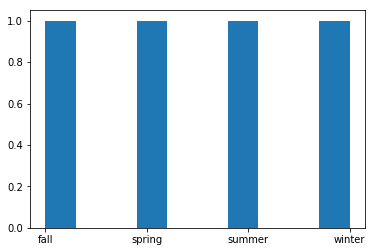

In [201]:
x_var = seasons
# plt.xlabel(np.arange(len(seasons)), seasons)
plt.hist(seasons)

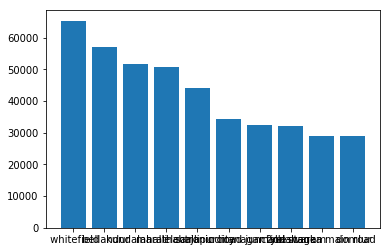

In [105]:
# Import Data
data = [(' whitefield', 65299), (' bellandur', 57061), (' kundalahalli', 51769), (' marathahalli', 50639),
(' electronic city', 44041), (' sarjapur road junction', 34164), (' indiranagar 2nd stage', 32459),
(' malleswaram', 32171), (' yelahanka main road', 28901), (' domlur', 28869)]

freequency = []
words = []

for line in data:
    freequency.append(line[1])
    words.append(line[0])

x_axis = np.arange(1, len(words) + 1, 1)

plt.bar(x_axis, freequency, align='center')
plt.xticks(x_axis, words)
plt.show()

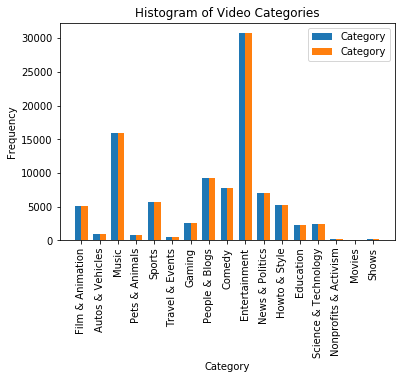

In [202]:
spring_category_groups = spring.groupby('category_id').groups
for item in spring_category_groups:
    spring_category_groups[item] = len(spring_category_groups[item])
spring_category_groups

cat_names = [category_name(x) for x in spring_category_groups]
cat_names

fig, ax = plt.subplots()
x_axis = np.arange(len(spring_category_groups))
width = 0.35
freqs = list(spring_category_groups.values())

# Plot normal bar chart
# plt.bar(x_axis, spring_category_groups.values(), align='center')
# plt.xticks(x_axis, cat_names)
# plt.xticks(rotation='vertical')
# plt.show()


# Plot grouped bar chart

rects1 = ax.bar(x_axis - width/2, freqs, width, label='Category')
rects2 = ax.bar(x_axis + width/2, freqs, width, label='Category')

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)




ax.set_ylabel('Frequency')
ax.set_xlabel('Category')
ax.set_title('Histogram of Video Categories')
ax.set_xticks(x_axis)
ax.set_xticklabels(cat_names)
# plt.xticks(x_axis, cat_names)  # does the same thing as the above 2 lines
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

['Dec 1979' 1341 574]
here


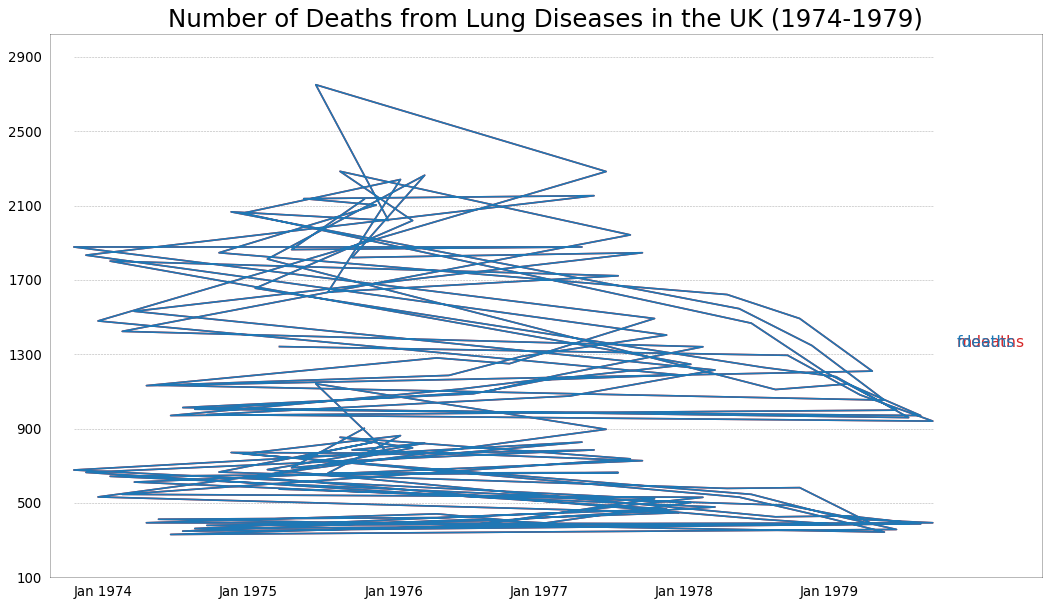

In [181]:
# Import Data
df3 = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df3.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

def f(x): return np.int(x)
f2 = np.vectorize(f)

vals = []
for x in df3.values:
    vals.append([x[1], x[2]])
print(df3.values[-1])

# changed second params of the below two calls
columns = df3.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df3.date.values, f2(vals), lw=1.5, color=mycolors[i])  
    plt.text(df3.shape[0]+1, df3.values[-1][1:2], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)


plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df3.shape[0], 12), df3.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
print('here')
plt.show()

